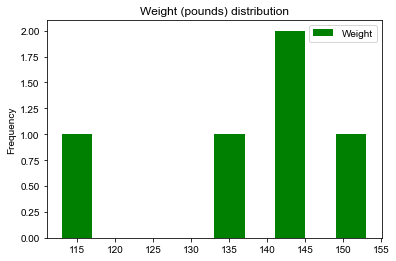

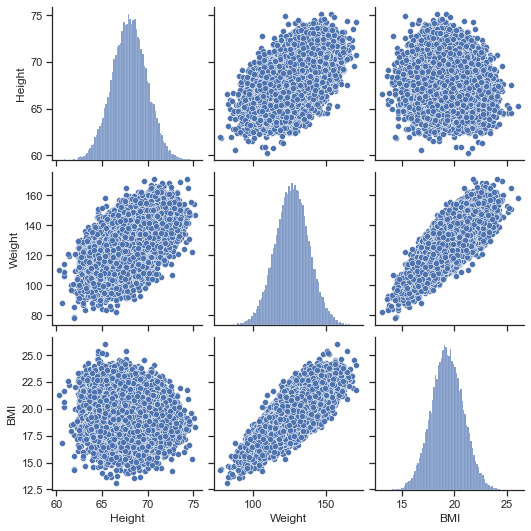

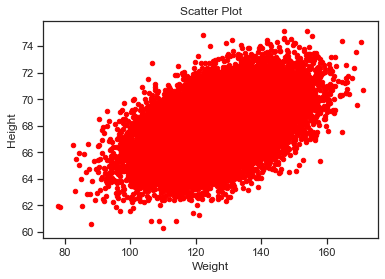

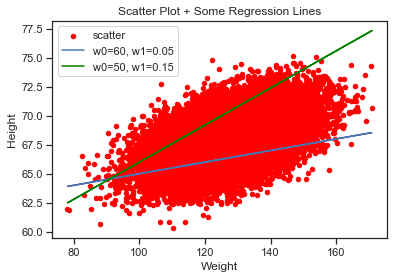

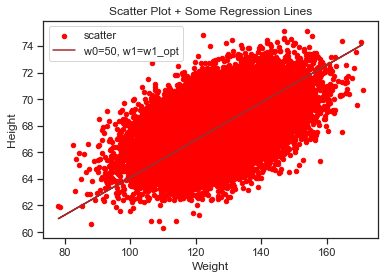

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# формируем дата фрейм
data = pd.read_csv('d:\\testing\\weights_heights.csv', index_col='Index')
cut_data = data.head()

# строим гистограмму для первых пяти строк данных
cut_data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (pounds) distribution')

# определяем коэффициент массы тела
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

# строим график попарных зависимостей Height, Weight, BMI
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)
plt.show()

# строим scatter plot
data.plot(y='Height', x='Weight', kind='scatter', 
           color='red',  title='Scatter Plot')

# определяем функцию ошибок, которую будем минимизировать в дальнейшем
def error_func(w0, w1):
    error = 0
    for number in range(len(data)):
        y = data.iat[number, 0]
        x = data.iat[number, 1]
        error += (y - (w0 + w1*x))**2
    return error

# на scatter plot накладываем две пробные регрессионные линии
xdata = []
ydata1 = []
ydata2 = []

for i in range(len(data)):
    xdata.append(data.iat[i, 1])
    ydata1.append(60 + 0.05*data.iat[i, 1])
    ydata2.append(50 + 0.16*data.iat[i, 1])   
    
data.plot(y='Height', x='Weight', kind='scatter', 
           color='red',  title='Scatter Plot + Some Regression Lines')
plt.plot(xdata, ydata1)
plt.plot(xdata, ydata2, color='green')
plt.legend(['scatter', 'w0=60, w1=0.05', 'w0=50, w1=0.15'])

# вводим новую функцию, равную предыдущей функции ошибок при
# фиксированном значении одного из коэффициентов, минимизируем ее
def error_func_50(x):
    return error_func(50, x)

res = scipy.optimize.minimize_scalar(error_func_50, bounds=(-5, 5), method='bounded')
res.x

# для информации: w1_opt получается равным 0.1410920372883444


# при найденном локальном минимуме w1 составляем регрессионную прямую и
# накладываем ее на scatter plot
ydata3 = []

for i in range(len(data)):
    ydata3.append(50 + 0.1410920372883444*data.iat[i, 1])
    
data.plot(y='Height', x='Weight', kind='scatter', 
           color='red',  title='Scatter Plot + Some Regression Lines')
plt.plot(xdata, ydata3, color='brown')
plt.legend(['scatter', 'w0=50, w1=w1_opt'])